# Aula 13: NLP - *Natural Language Processing*
---

## Roteiro da Aula

1. Introdução
2. Instalação da biblioteca do NLTK
3. Entendendo os principais conceitos do NLP
4. Feature Extraction  
    a. Bag of Words  
    b. TF-IDF  
5. Análise de Sentimentos

## Introdução

Processamento de linguagem natural é uma subárea de Inteligência artificial que tem como objetivo extrair informação a partir de **linguagem natural**, isto é, a linguagem do dia-a-dia de seres humanos.

Assim, PLN compreende a análise e processamento tanto de textos (mensagens, tweets, notícias, documentos, livros, etc.) quanto de áudios transcritos (músicas, filmes, conversas telefônicas, etc.).

PLN pode ser definido como uma forma de interpretar quem fez o quê, quando, onde, como e porque.

Algumas das estratégias de PLN incluem usar conceitos linguísticos como análise sintática, semântica, léxica e morfológica da língua em questão. 

O objetivo é o de criar resumos, extrair informação de textos, interpretar sentidos, analisar sentimentos e aprender conceitos a partir da linguagem natural.

### Bibliotecas

1. [NLTK](http://www.nltk.org)
2. [Spacy](https://spacy.io/usage/models#quickstart)

### Instalação do NLTK

In [1]:
!pip install nltk

In [5]:
# Importação das bibliotecas
import nltk
import pandas as pd
import numpy as np

In [6]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [7]:
# Ler os dados
df = pd.read_csv('spamraw.csv')

In [8]:
df.head()

,type,text
0,ham,Hope you are having a good week. Just checking in
1,ham,K..give back my thanks.
2,ham,Am also doing in cbe only. But have to pay.
3,spam,"complimentary 4 STAR Ibiza Holiday or £10,000 ..."
4,spam,okmail: Dear Dave this is your final notice to...


In [9]:
df.shape

(5559, 2)

In [10]:
df.describe()

,type,text
count,5559,5559
unique,2,5156
top,ham,"Sorry, I'll call later"
freq,4812,30


---

#### Exemplo de utilização do `describe` em variáveis categóricas

In [17]:
exemplo = pd.read_csv('https://s3-sa-east-1.amazonaws.com/lcpi/5729687e-ae14-4978-8cd7-7ef18277813d.csv')

In [18]:
exemplo.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
exemplo.describe(include=['object'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


---

In [25]:
# Obter comprimento dos textos
df['length'] = df.text.apply(len)

In [26]:
df.head()

,type,text,length
0,ham,Hope you are having a good week. Just checking in,49
1,ham,K..give back my thanks.,23
2,ham,Am also doing in cbe only. But have to pay.,43
3,spam,"complimentary 4 STAR Ibiza Holiday or £10,000 ...",149
4,spam,okmail: Dear Dave this is your final notice to...,161


### Para refletir...

- Como transformar um dado não estruturado em algo consumível por uma IA (de ML)?  
- Como transformar de algum jeito nossos dados em formato de texto em variáveis numéricas.

## Tokenização

Transformar nosso texto em tokens ('pedaços') -> quebrar nosso texto por palavras, caracteres, sentenças, parágrafos, etc...

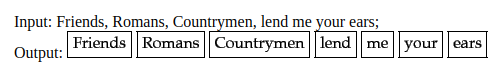

### Método 1: SpaceTokenizer

In [27]:
from nltk.tokenize import SpaceTokenizer

In [30]:
space_tokenizer = SpaceTokenizer()


text_tokenized = [space_tokenizer.tokenize(text) for text in df['text']]

text_tokenized[0]

['Hope',
 'you',
 'are',
 'having',
 'a',
 'good',
 'week.',
 'Just',
 'checking',
 'in']

In [32]:
df['text'][0]

'Hope you are having a good week. Just checking in'

### Método 2: word_tokenize

Necessário realizar o download do `punkt` do nltk. Caso obtenha algum erro na execução do código abaixo, siga as instruções a seguir:

`nltk.download('punkt')`

#### Em caso de erro [[fonte](https://stackoverflow.com/questions/38916452/nltk-download-ssl-certificate-verify-failed)]

```
The downloader script is broken. As a temporal workaround can manually download the punkt tokenizer from here and then place the unzipped folder in the corresponding location. The default folders for each OS are:

Windows: C:\nltk_data\tokenizers
OSX: /usr/local/share/nltk_data/tokenizers
Unix: /usr/share/nltk_data/tokenizers
```

In [23]:
# nltk.download('punkt')

[nltk_data] Downloading package punkt to /Users/walisson/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [33]:
from nltk.tokenize import word_tokenize

In [35]:
word_tokenize('This a lecture. This lecture is about NLP!')

['This', 'a', 'lecture', '.', 'This', 'lecture', 'is', 'about', 'NLP', '!']

In [34]:
text_tokenized = [word_tokenize(text) for text in df['text']]

text_tokenized[0]

['Hope',
 'you',
 'are',
 'having',
 'a',
 'good',
 'week',
 '.',
 'Just',
 'checking',
 'in']

## Normalização

Reduzir o número de tokens (dimensões) e padronizar o texto.

- Removendo as pontuações
- Realizando uma lemmatização
- Deixando todos os tokens em caixa baixa (minúsculos)

In [36]:
text_tokenized

[['Hope',
  'you',
  'are',
  'having',
  'a',
  'good',
  'week',
  '.',
  'Just',
  'checking',
  'in'],
 ['K', '..', 'give', 'back', 'my', 'thanks', '.'],
 ['Am',
  'also',
  'doing',
  'in',
  'cbe',
  'only',
  '.',
  'But',
  'have',
  'to',
  'pay',
  '.'],
 ['complimentary',
  '4',
  'STAR',
  'Ibiza',
  'Holiday',
  'or',
  '£10,000',
  'cash',
  'needs',
  'your',
  'URGENT',
  'collection',
  '.',
  '09066364349',
  'NOW',
  'from',
  'Landline',
  'not',
  'to',
  'lose',
  'out',
  '!',
  'Box434SK38WP150PPM18+'],
 ['okmail',
  ':',
  'Dear',
  'Dave',
  'this',
  'is',
  'your',
  'final',
  'notice',
  'to',
  'collect',
  'your',
  '4',
  '*',
  'Tenerife',
  'Holiday',
  'or',
  '#',
  '5000',
  'CASH',
  'award',
  '!',
  'Call',
  '09061743806',
  'from',
  'landline',
  '.',
  'TCs',
  'SAE',
  'Box326',
  'CW25WX',
  '150ppm'],
 ['Aiya',
  'we',
  'discuss',
  'later',
  'lar',
  '...',
  'Pick',
  'u',
  'up',
  'at',
  '4',
  'is',
  'it',
  '?'],
 ['Are', 'you',

In [40]:
import string

pontuacoes = string.punctuation

pontuacoes

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [43]:
text_normalized = []

for document in text_tokenized:
    text_normalized.append([token.lower() for token in document if token not in pontuacoes])
    
text_normalized[0]

['hope', 'you', 'are', 'having', 'a', 'good', 'week', 'just', 'checking', 'in']

## Lemmatização

Tem como objetivo reduzir uma palavra à sua forma base e agrupar diferentes formas da mesma palavra. Por exemplo, os verbos no tempo passado são alterados para presente (por exemplo, “foi” é alterado para “vai”) e os sinônimos são unificados (por exemplo, “melhor” é alterado para “bom”), padronizando palavras com significado semelhante à sua raiz. 

A lematização resolve as palavras em sua forma de dicionário (conhecida como lema), para a qual requer dicionários detalhados nos quais o algoritmo pode pesquisar e vincular palavras aos lemas correspondentes.

Por exemplo, as palavras “correr", "corre" e "correu" são todas formas da palavra "correr", portanto "correr" é o lema de todas as palavras anteriores.

In [17]:
# nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/walisson/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [44]:
from nltk.stem import WordNetLemmatizer

In [45]:
lemmatizer = WordNetLemmatizer()

In [50]:
text_lemmatized = []

for document in text_normalized:
    text_lemmatized.append([lemmatizer.lemmatize(token, pos='v') for token in document])

# Lemmatizado
text_lemmatized[0]

['hope', 'you', 'be', 'have', 'a', 'good', 'week', 'just', 'check', 'in']

In [48]:
# Normalizado (anterior)
text_normalized[0]

['hope', 'you', 'are', 'having', 'a', 'good', 'week', 'just', 'checking', 'in']

### Stemming

Radical 

Amor/amar/amando -> am (radical)

amora/amoras/amorazinha/ amorão -> amor (radical)

In [51]:
from nltk.stem import PorterStemmer, RSLPStemmer

## Remoção de StopWords

In [90]:
# nltk.download('stopwords')

In [52]:
from nltk import corpus

In [54]:
stopwords = corpus.stopwords.words('english')

In [55]:
text_without_stopwords = []

for document in text_lemmatized:
    text_without_stopwords.append([token for token in document if token not in stopwords])

# Sem as stopwords
text_without_stopwords[0]

['hope', 'good', 'week', 'check']

**Isso termina nossa etapa de processamento.**

## Feature Extraction

## 1º Método: contar as palavras (Bag of Words)

Keep it simple!

- Casa vermelha
- Casa verde

casa | vermelha | verde
-----:|--------:|------
1    | 1       |   0
1   | 0       | 1

In [56]:
from sklearn.feature_extraction.text import CountVectorizer

In [84]:
df['text']

0       Hope you are having a good week. Just checking in
1                                 K..give back my thanks.
2             Am also doing in cbe only. But have to pay.
3       complimentary 4 STAR Ibiza Holiday or £10,000 ...
4       okmail: Dear Dave this is your final notice to...
                              ...                        
5554    You are a great role model. You are giving so ...
5555    Awesome, I remember the last time we got someb...
5556    If you don't, your prize will go to another cu...
5557    SMS. ac JSco: Energy is high, but u may not kn...
5558                      Shall call now dear having food
Name: text, Length: 5559, dtype: object

In [70]:
bow = CountVectorizer(max_features=100, stop_words=stopwords)

bow.fit(df['text'])

bow_text_transformed = bow.transform(df.text)

In [71]:
bow_text_transformed

<5559x100 sparse matrix of type '<class 'numpy.int64'>'
	with 12821 stored elements in Compressed Sparse Row format>

In [72]:
31309 / (5559 * 100) * 100

5.632128080590034

In [73]:
bow_text_transformed.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [1, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [74]:
bow.get_feature_names()

['150p',
 'already',
 'also',
 'anything',
 'ask',
 'babe',
 'back',
 'call',
 'care',
 'cash',
 'claim',
 'com',
 'come',
 'cos',
 'da',
 'day',
 'dear',
 'dont',
 'every',
 'find',
 'free',
 'get',
 'give',
 'go',
 'going',
 'good',
 'got',
 'great',
 'happy',
 'hey',
 'hi',
 'home',
 'hope',
 'im',
 'know',
 'last',
 'later',
 'let',
 'life',
 'like',
 'lol',
 'lor',
 'love',
 'make',
 'meet',
 'message',
 'miss',
 'mobile',
 'morning',
 'msg',
 'much',
 'need',
 'new',
 'night',
 'nokia',
 'number',
 'oh',
 'ok',
 'one',
 'phone',
 'pick',
 'please',
 'pls',
 'prize',
 'really',
 'reply',
 'right',
 'said',
 'say',
 'see',
 'send',
 'sent',
 'something',
 'sorry',
 'still',
 'stop',
 'sure',
 'take',
 'tell',
 'text',
 'thanks',
 'think',
 'time',
 'today',
 'tomorrow',
 'txt',
 'uk',
 'ur',
 'urgent',
 'want',
 'wat',
 'way',
 'week',
 'well',
 'win',
 'work',
 'would',
 'www',
 'yeah',
 'yes']

In [78]:
df_bow = pd.DataFrame(data=bow_text_transformed.toarray(), columns=bow.get_feature_names())

In [80]:
df_bow.head()

,150p,already,also,anything,ask,babe,back,call,care,cash,...,wat,way,week,well,win,work,would,www,yeah,yes
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,0


In [81]:
df_bow['target'] = df['type'].map({ 'ham': 0, 'spam': 1 })

In [82]:
df_bow.head()

,150p,already,also,anything,ask,babe,back,call,care,cash,...,way,week,well,win,work,would,www,yeah,yes,target
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1


### Utilizando uma Floresta Aleatória para a Classificação

## 2º Método: TF-IDF

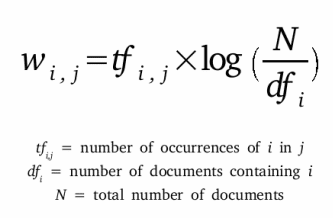

In [83]:
from sklearn.feature_extraction.text import TfidfTransformer, TfidfVectorizer

In [86]:
df['text']

0       Hope you are having a good week. Just checking in
1                                 K..give back my thanks.
2             Am also doing in cbe only. But have to pay.
3       complimentary 4 STAR Ibiza Holiday or £10,000 ...
4       okmail: Dear Dave this is your final notice to...
                              ...                        
5554    You are a great role model. You are giving so ...
5555    Awesome, I remember the last time we got someb...
5556    If you don't, your prize will go to another cu...
5557    SMS. ac JSco: Energy is high, but u may not kn...
5558                      Shall call now dear having food
Name: text, Length: 5559, dtype: object

In [89]:
tfidf = TfidfVectorizer(max_features=100) # Criando o TF-IDF

tfidf_transformado = tfidf.fit_transform(df['text']) # Treina e transforma os e-mails na matriz do TF-IDF

In [90]:
tfidf.fit(df['text'])

tfidf_transformado = tfidf.transform(df['text'])

tfidf_transformado

<5559x100 sparse matrix of type '<class 'numpy.float64'>'
	with 31309 stored elements in Compressed Sparse Row format>

In [91]:
tfidf_transformado.toarray()

array([[0.        , 0.        , 0.        , ..., 0.        , 0.24987551,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.4953806 , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.16048231,
        0.23264337],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [92]:
tfidf.get_feature_names()

['about',
 'all',
 'am',
 'and',
 'any',
 'are',
 'as',
 'at',
 'back',
 'be',
 'been',
 'but',
 'by',
 'call',
 'can',
 'come',
 'da',
 'day',
 'did',
 'do',
 'don',
 'dont',
 'for',
 'free',
 'from',
 'get',
 'go',
 'going',
 'good',
 'got',
 'have',
 'he',
 'her',
 'hi',
 'home',
 'how',
 'if',
 'in',
 'is',
 'it',
 'its',
 'just',
 'know',
 'later',
 'like',
 'll',
 'lor',
 'love',
 'me',
 'mobile',
 'my',
 'need',
 'new',
 'no',
 'not',
 'now',
 'of',
 'ok',
 'on',
 'one',
 'only',
 'or',
 'our',
 'out',
 'please',
 'pls',
 'reply',
 'see',
 'send',
 'she',
 'so',
 'sorry',
 'still',
 'stop',
 'take',
 'tell',
 'text',
 'that',
 'the',
 'then',
 'there',
 'they',
 'think',
 'this',
 'time',
 'to',
 'today',
 'txt',
 'up',
 'ur',
 'want',
 'was',
 'we',
 'week',
 'what',
 'when',
 'will',
 'with',
 'you',
 'your']

## Análise de Sentimentos
---

VADER (Valence Aware Dictionary for Sentiment Reasoning) é um modelo usado para análise de sentimento de texto que é sensível tanto à polaridade (positiva / negativa) quanto à intensidade (força) da emoção. Ele está disponível no pacote NLTK e pode ser aplicado diretamente a dados de texto não rotulados.

![alt text](https://miro.medium.com/max/938/1*JSi4ZRojnsNZBJVtGUfXZQ.png)

- Exemplo: "love", "like", "happy" são associados a "Positive Sentiment";
- "did not love" é associado a "Negative Sentiment";

Além disso, o VADER também é capaz de diferenciar intensidades diferentes de sentimentos, como por exemplo uma ênfase em "LOVE U!!!!" e "HATE THAT!" além de Emojis, gírias e acrônimos (OMG).

Alguns desafios/limitações do modelo:
  - Identificar positive e negative sentiment na mesma frase;
  - Identificar sarcasmo e ironia.

In [53]:
# nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/walisson/nltk_data...


True